### Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

***Описание данных:***
market_file.csv
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

market_time.csv
- Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

План проекта:

[1. Загрузка данных](#Шаг_1)

[2. Предобработка данных](#Шаг_2)

[3. Исследовательский анализ данных](#Шаг_3)

[4. Объединение таблиц](#Шаг_4)

[5. Корреляционный анализ](#Шаг_5)

[6. Испльзование пайплайнов](#Шаг_6)

[7. Анализ важности признаков](#Шаг_7)

[8.Сегментация покупателей.](#Шаг_8)

[9.Вывод.](#Шаг_9)

#### Шаг_1
## Загрузка данных

In [1]:
#Установка библиотек
!pip install scikit-learn==1.1.3
!pip install shap -q
!pip -q install phik


In [2]:
#!pip install matplotlib
#!pip install -U seaborn
#!pip install numpy==1.23
#!pip install -U pandas
#!pip install -U numpy
#!pip install -U shap
#!pip install -U seaborn
#!pip install -U math
#!pip install -U scipy
#import missingno as msno #Визуализация пропусков
#!pip install -U warnings 

In [3]:
#Импорт библиотек
import pandas as pd
import shap
import seaborn as sns
import numpy as np
import math
import scipy.stats as st
import re
import phik
#import missingno as msno #Визуализация пропусков
import warnings # Работа с предупреждениями.
warnings.filterwarnings("ignore")
#Настройка исрументов
from matplotlib import pyplot as plt #Диаграмы
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error #Метрика MSE 
from sklearn.metrics import mean_absolute_error #Метрика MAE
from sklearn.metrics import r2_score #Метрика детерминации R2
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,f1_score  # загружаем функцию для работы с метриками
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # загружаем класс pipeline
from sklearn.impute import SimpleImputer # загружаем класс для работы с пропусками

RANDOM_STATE = 42
TEST_SIZE = 0.25


In [4]:
#Настройки пандас
pd.set_option('display.max_columns', None)# Отображение всех столбцов в таблице;
pd.set_option('display.max_rows', None) # Отображение всех строк в таблице;
pd.set_option('display.max_colwidth', None) # текст в ячейке отражался полностью вне зависимости от длины;
pd.set_option('display.float_format', '{:.2f}'.format) #-все числа отражались с двумя знаками после запятой;

In [5]:
#Загрузка данных
df_market_file = pd.read_csv('/datasets/market_file.csv',sep=',')
df_market_money = pd.read_csv('/datasets/market_money.csv',sep=',')
df_market_time = pd.read_csv('/datasets/market_time.csv',sep=',')
df_money = pd.read_csv('/datasets/money.csv',sep=';',decimal=',')

In [6]:
#Просмотр загрузок
display(df_market_file.sample(1))
display(df_market_money.sample(1))
display(df_market_time.sample(1))
display(df_money.sample(1))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
941,216289,Прежний уровень,стандарт,да,5.40,3,512,0.29,Домашний текстиль,3,4,4,10


,id,Период,Выручка
617,215553,предыдущий_месяц,4138.00


,id,Период,минут
1045,215870,текущий_месяц,11


,id,Прибыль
165,215513,3.15


In [7]:
#Просмотр df_market_file
print(df_market_file.info())
#Просмотр df_market_money
print(df_market_money.info())
#Просмотр df_market_time
print(df_market_time.info())
#Просмотр df_money
print(df_money.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

**Вывод по шагу_1:**Выполнена загрузка данных.

#### Шаг_2 
## Предобработка данных

In [8]:
#Проверка таблиц на пропуски
print(df_market_file.isna().sum())
print(df_market_money.isna().sum())
print(df_market_time.isna().sum())
print(df_money.isna().sum())

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64
id         0
Период     0
Выручка    0
dtype: int64
id        0
Период    0
минут     0
dtype: int64
id         0
Прибыль    0
dtype: int64


**Вывод:** Осуществлена проверка на пропуски в данных. Пропусков в данных нет.

In [9]:
display(df_market_file.head(1))
display(df_market_money.head(1))
display(df_market_time.head(1))
display(df_money.head(1))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00


,id,Период,минут
0,215348,текущий_месяц,14


,id,Прибыль
0,215348,0.98


In [10]:
# Преобразуем тип данных-заменим запятые на точки
#df_money['Прибыль']=df_money['Прибыль'].apply(lambda x: x.replace(",", "."))
#df_money['Прибыль']=df_money['Прибыль'].astype('float')
#df_money.info()

In [11]:
#функция замены точек на запятые
#def replace_dots (row,list_rep):
#    for i in list_rep:
#        row[i]=row[i].apply(lambda x: x.replace(",", "."))
#        row[i]=row[i].astype('float')
#num_col_money= df_market_file.columns.tolist()
#df_money=df_money.apply(replace_dots, kwargs = num_col_money, axis=1)

***Вывод:*** потребовалось преобразование только одного типа данных в df_money.

In [12]:
#Поиск явных дубликатов
print('Количество дубликатов в df_market_file равно',df_market_file.duplicated().sum())
print('Количество дубликатов в df_market_money равно',df_market_money.duplicated().sum())
print('Количество дубликатов в df_market_time равно',df_market_time.duplicated().sum())
print('Количество дубликатов в df_money равно',df_money.duplicated().sum())

#df_market_file
#df_market_money
#df_market_time
#df_money

Количество дубликатов в df_market_file равно 0
Количество дубликатов в df_market_money равно 0
Количество дубликатов в df_market_time равно 0
Количество дубликатов в df_money равно 0


In [13]:
#Проверка на неявные дубликаты
def dublicates (row):
    cat_col_names = row.select_dtypes(exclude='number').columns.tolist()
    for i in cat_col_names:
        print (row[i].unique())
        print()

In [14]:
#Проверка неявных дубликатов df_market_file
dublicates(df_market_file)
#Проверка неявных дубликатовdf_market_money
dublicates(df_market_money)
#Проверка неявных дубликатов df_market_time
dublicates(df_market_time)
#Проверка неявных дубликатов df_money
dublicates(df_money)

['Снизилась' 'Прежний уровень']

['премиум' 'стандартт' 'стандарт']

['да' 'нет']

['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

['текущий_месяц' 'предыдцщий_месяц']



In [15]:
#Удаление не явных дубликатов.
df_market_file['Тип сервиса']=df_market_file['Тип сервиса'].str.replace('стандартт','стандарт')
df_market_time['Период']=df_market_time['Период'].str.replace('предыдцщий_месяц','предыдущий_месяц')


In [16]:
#приведем название колонок к "змеиному регистру"
#import re
#re.sub(pattern, repl, string, count=0, flags=0)
df_market_file.columns = [re.sub('\s','_', i).lower() for i in df_market_file.columns]
df_market_time.columns = [re.sub('\s','_', i).lower() for i in df_market_time.columns]
df_market_money.columns= [re.sub('\s','_', i).lower() for i in df_market_money.columns]
df_money.columns = [re.sub('\s','_', i).lower() for i in df_money.columns]
#Проверим
print(df_market_file.columns)
print(df_market_time.columns)
print(df_market_money.columns)
print(df_money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


***Вывод:*** Удалены неявные дубликаты в df_market_file, df_market_time.

Общий вывод по шагу 2:
- Осуществлена проверка на пропуски в данных. Пропусков в данных нет.
- Удалены неявные дубликаты в df_market_file, df_market_time.
- Выполнено преобразование только одного типа данных в df_money.

#### Шаг_3
## Исследовательский анализ данных

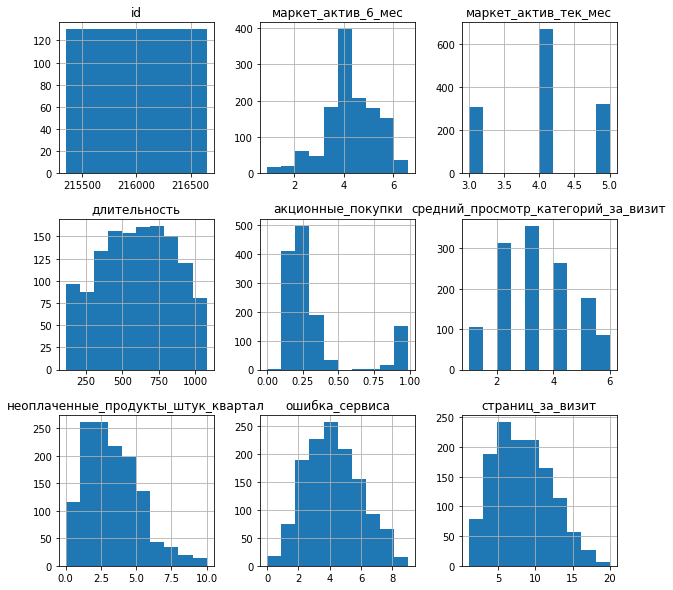

In [17]:
df_market_file.hist(figsize=(10, 10))
plt.show()

In [18]:
#Функция анализа числовых значений
def hist_box(data, column):#, target):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column)# hue = 'покупательская_активность')
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    plt.axvline(np.median(data[column]), color='red', linestyle='dashed', linewidth=3, label='Медиана')
    plt.axvline(np.mean(data[column]), color='black', linestyle='dashed', linewidth=3, label='Среднее')
    plt.axvline(np.percentile(data[column], 25), color='orange', linestyle='dashed', linewidth=3, label='1-й квартиль')
    plt.axvline(np.percentile(data[column], 75), color='green', linestyle='dashed', linewidth=3, label='3-й квартиль')
    
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца {column}')
    plt.title(f'Диаграмма размаха для {column}')
    sns.boxplot(x=data[column])
    
def hist_box_h(data, column):#, target):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=column, hue = 'покупательская_активность')
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    plt.axvline(np.median(data[column]), color='red', linestyle='dashed', linewidth=3, label='Медиана')
    plt.axvline(np.mean(data[column]), color='black', linestyle='dashed', linewidth=3, label='Среднее')
    plt.axvline(np.percentile(data[column], 25), color='orange', linestyle='dashed', linewidth=3, label='1-й квартиль')
    plt.axvline(np.percentile(data[column], 75), color='green', linestyle='dashed', linewidth=3, label='3-й квартиль')
    
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца {column}')
    plt.title(f'Диаграмма размаха для {column}')
    #sns.boxplot(x=data[column])
    sns.boxplot(data=data, y=column, x='покупательская_активность');
    

count   1300.00
mean       4.25
std        1.01
min        0.90
25%        3.70
50%        4.20
75%        4.90
max        6.60
Name: маркет_актив_6_мес, dtype: float64
count   1300.00
mean       4.01
std        0.70
min        3.00
25%        4.00
50%        4.00
75%        4.00
max        5.00
Name: маркет_актив_тек_мес, dtype: float64
count   1300.00
mean     601.90
std      249.86
min      110.00
25%      405.50
50%      606.00
75%      806.00
max     1079.00
Name: длительность, dtype: float64
count   1300.00
mean       0.32
std        0.25
min        0.00
25%        0.17
50%        0.24
75%        0.30
max        0.99
Name: акционные_покупки, dtype: float64
count   1300.00
mean       3.27
std        1.36
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        6.00
Name: средний_просмотр_категорий_за_визит, dtype: float64
count   1300.00
mean       2.84
std        1.97
min        0.00
25%        1.00
50%        3.00
75%        4.00
max       10.00
Name: неоплачен

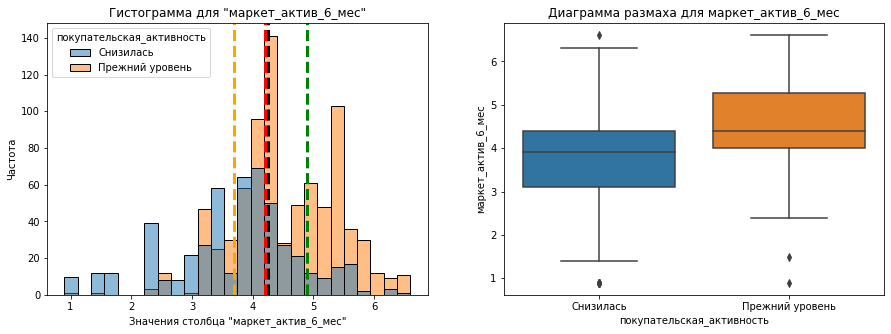

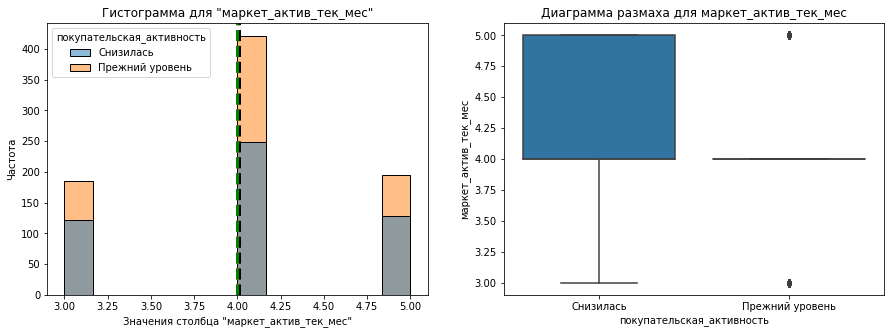

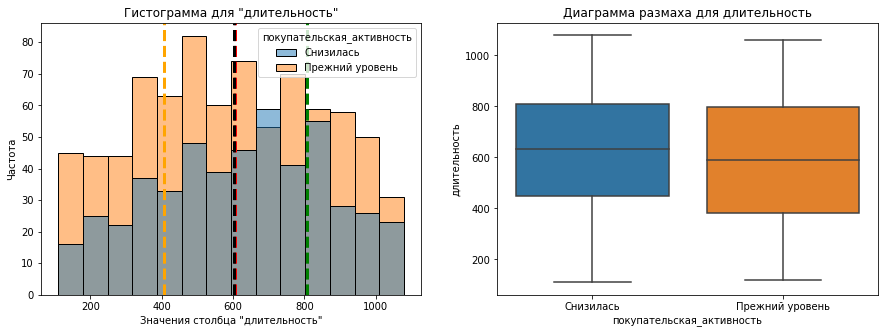

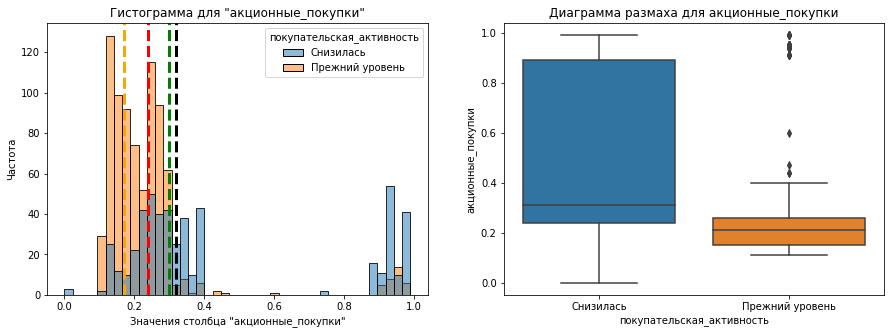

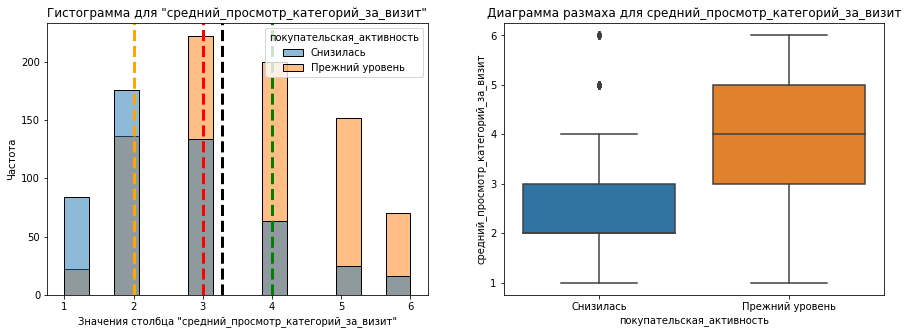

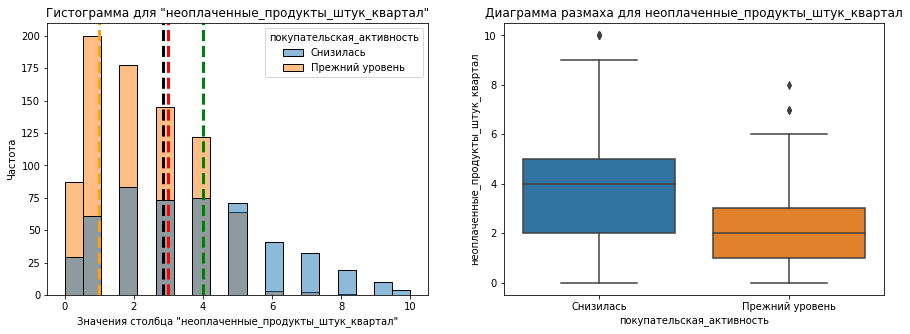

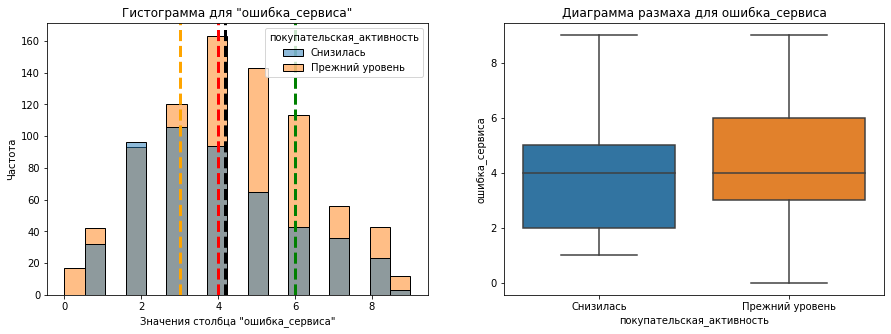

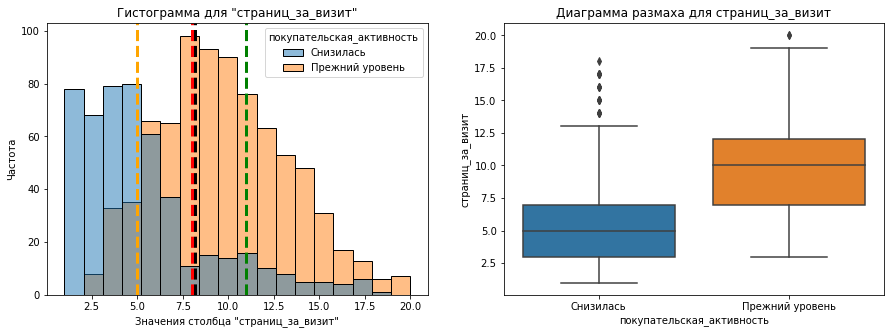

In [19]:
# построим гистограммы размаха для количественных значений
num_col_names = df_market_file.select_dtypes(include='number').columns.tolist()
num_col_names.remove('id') #удалим ID из списка.
for i in num_col_names:
    hist_box_h(df_market_file, i )
    print(df_market_file[i] .describe())

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


    num_col_names.remove('id') 
    
    
    
Так может Стоило сразу сделать из 'id' индекс. Ведь очевидно что он не может нести какой-то пользу для анализа и моделирования     

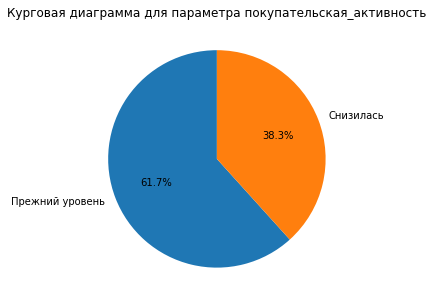

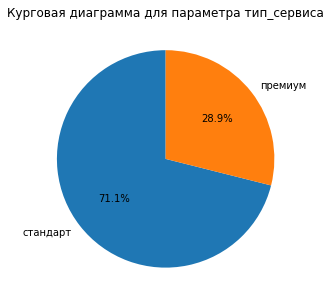

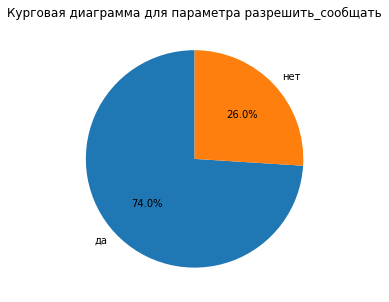

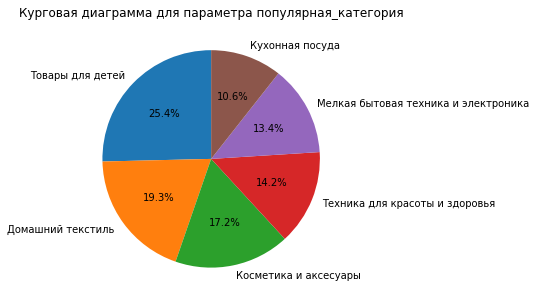

In [20]:
#исследуем категориальные значения
cat_col_names = df_market_file.select_dtypes(exclude='number').columns.tolist()
for i in cat_col_names:
    plt.figure(figsize = (15,5))
    plt.pie(df_market_file[i].value_counts(), labels=df_market_file[i].value_counts().index, autopct='%1.1f%%',startangle = 90)
    plt.title(f'Курговая диаграмма для параметра {i}')
    plt.show

count     3900.00
mean      5025.70
std       1777.70
min          0.00
25%       4590.15
50%       4957.50
75%       5363.00
max     106862.20
Name: выручка, dtype: float64


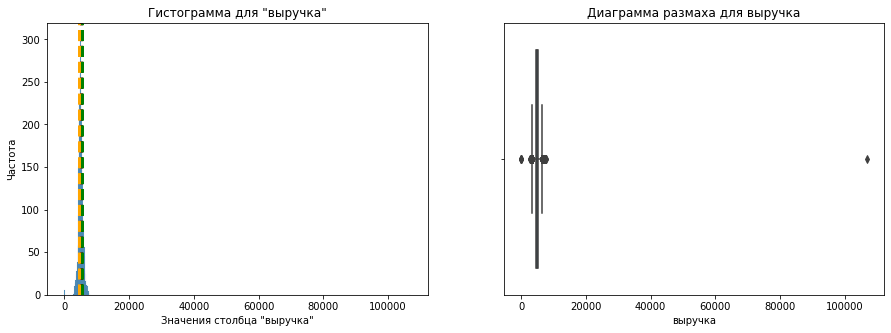

In [21]:
#df_market_money
# Построим диаграмы размаха для количественных значений df_market_money
# построим гистограммы размаха для количественных значений
num_col_names = df_market_money.select_dtypes(include='number').columns.tolist()
num_col_names.remove('id') #удалим ID из списка.
for i in num_col_names:
    hist_box(df_market_money, i )
    print(df_market_money[i] .describe())

In [22]:
#Посомтрим выброс и удалим
display(df_market_money[df_market_money['выручка']>20000])


,id,период,выручка
98,215380,текущий_месяц,106862.20


In [23]:
df_market_money=df_market_money[df_market_money['id']!=215380]
df_market_file=df_market_file[df_market_file['id']!=215380]
print(df_market_money.shape)
print(df_market_file.shape)

(3897, 3)
(1299, 13)


count   3897.00
mean    4999.29
std      706.97
min        0.00
25%     4590.00
50%     4956.00
75%     5363.00
max     7799.40
Name: выручка, dtype: float64


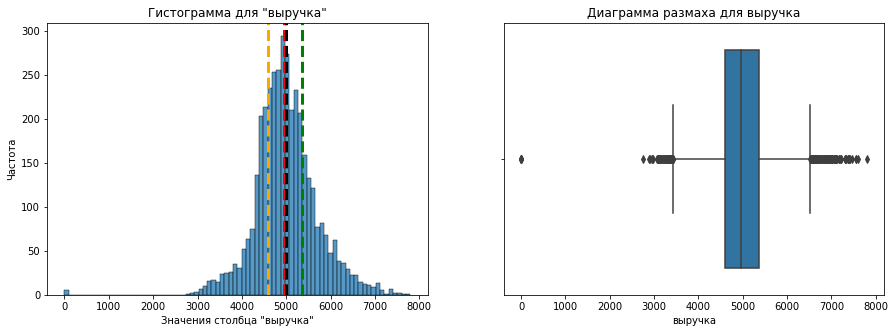

In [24]:
#Проеверим
num_col_names = df_market_money.select_dtypes(include='number').columns.tolist()
num_col_names.remove('id') #удалим ID из списка.
for i in num_col_names:
    hist_box(df_market_money, i )
    print(df_market_money[i] .describe())

**Вывод:**

Вывод по числовым колонкам: 

+ По графе "Маркет_актив_6_мес" среднее значение 4.25, медиана 4.2 минимум 0.9, макисмум 6.6
+ По графе "Маркет_актив_тек_мес" среднее значение 4.01, медиана 4 минимум 3, макисмум 5
+ По графе "Длительность" среднее значение 601 , медиана 606 минимум 110, макисмум 1079
+ По графе "Акционные_покупки" среднее значение 0.32 , медиана 0.24 минимум 0, макисмум 0.99
+ По графе "Средний_просмотр_категорий_за_визит" среднее значение 3.27 , медиана 3 минимум 1, макисмум 6
+ По графе "Неоплаченные_продукты_штук_квартал" среднее значение 2.84 , медиана 3 минимум 0, макисмум 10
+ По графе "Ошибка_сервиса" среднее значение 4.19 , медиана 4 минимум 0, макисмум 9
+ По графе "Страниц_за_визит" среднее значение 8.18 , медиана 8 минимум 1, макисмум 20

Распределение нормальное, присутствуют выбросы.
По категориальны колонкам
- Активность снизилась у 38%
- Тип сервиса преобладает "стандатный" 71%
- Как правило клиенты в 74% разрешают использовать номер телефона для рекламы
По категориям:
- товары для детей составляют 25,4%
- домашний текстиль 19,3%
- Косметика и аксесуары 17,2%
- Техника для красоты и здоровья 14,2%
- Кухонная посуда 10,6%
- Мелкая бытовая техника и электроника 13,4%

#### Шаг_4
## Объединение таблиц

Объеденение таблиц df_market_file, df_market_money, df_market_time с учетом создания отдельных столбцов для каждого периода.

In [25]:
#Подсчет сумарной выручки за текущий/предыдущий месяц
data_money=df_market_money.pivot_table(index = 'id', columns ='период',values = 'выручка', aggfunc ='sum')
data_money.columns=['выручка_предыдущий_месяц','выручка_за_месяц_до_текущего','выручка_текущий_месяц']
#Добавим занчения в основную таблицу
data=df_market_file.merge(data_money, how ='left', on = 'id')

In [26]:
#Подсчет сумарного времени за текущий/предыдущий месяц
data_time=df_market_time.pivot_table(index = 'id', columns ='период',values = 'минут', aggfunc ='sum')
data_time.columns=['время_предыдущий_месяц','время_текущий_месяц']
#Добавим занчения в основную таблицу
data=data.merge(data_time, how ='left', on = 'id')

In [27]:
#Проверим
display(data.sample(1))


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_за_месяц_до_текущего,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
275,215624,Снизилась,премиум,нет,2.40,4,399,0.35,Косметика и аксесуары,2,4,3,3,5009.00,4646.00,4439.60,7,15


In [28]:
# Отбор клиентов с покупательской активностью не менее трёх месяцев(т.е. в 3х последних месяцах должны быть покупки)

inactive = data.query('выручка_предыдущий_месяц==0 or выручка_текущий_месяц==0 or выручка_за_месяц_до_текущего==0')['id'].tolist()

data=data.query('id not in @inactive')
print(data.shape)
df_money=df_money.query('id not in @inactive')
print(df_money.shape)

(1296, 18)
(1297, 2)


**Вывод по шагу №4:** Произведено объединение данных, отобраны клинеты с покупательной активностью  не менее 3х месяцев.

#### Шаг_5
## Корреляционный анализ

In [29]:
#data.columns

In [30]:
#Построим матрицу корреляции Пирсона
#plt.figure(figsize = (15,5))
#sns.heatmap(data[['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
#       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
#       'акционные_покупки', 'популярная_категория',
#       'средний_просмотр_категорий_за_визит',
#       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
#       'страниц_за_визит', 'выручка_предыдущий_месяц',
#       'выручка_за_месяц_до_текущего', 'выручка_текущий_месяц',
#       'время_предыдущий_месяц', 'время_текущий_месяц']].corr(), annot=True,fmt = '.2f',cmap='bwr')
#plt.title('Тепловая карта. Визуализация корреляций.', fontsize=14, fontweight="bold") 
#plt.show()

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_за_месяц_до_текущего', 'выручка_текущий_месяц', 'время_предыдущий_месяц', 'время_текущий_месяц']


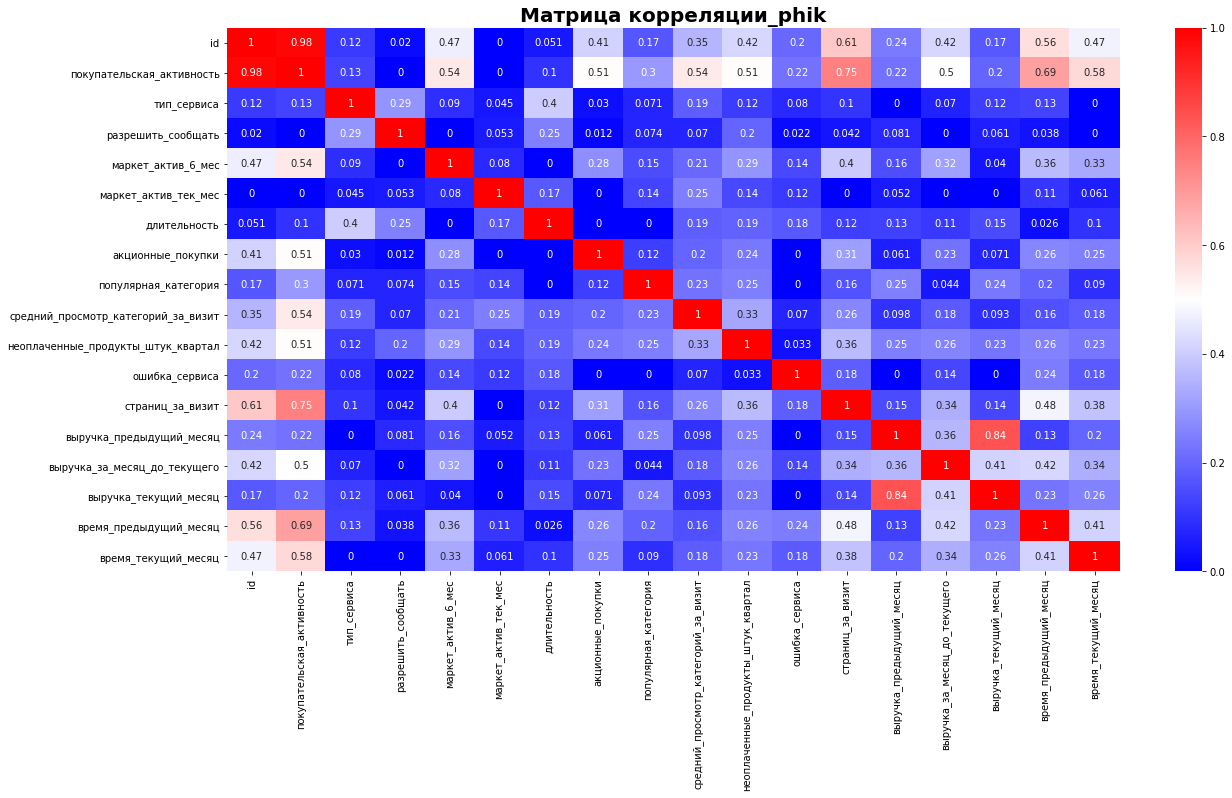

In [31]:
corr_matrix = data.phik_matrix()
plt.figure(figsize=(20,10))

sns.heatmap(corr_matrix, annot=True, cmap='bwr')
plt.title('Матрица корреляции_phik', fontsize=20, fontweight="bold" )
plt.show()

Целевой признак "Покупательская активность":
Bмеет высокую корреляцию с признаками "страниц за визит'.
Заметную корреляцию с признаками 'маркет_актив_6_мес', 'акционные_покупки','средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал','выручка_за_месяц_до_текущего',  'время_предыдущий_месяц', 'время_текущий_месяц'.
Умеренную с признаком 'популярная_категория.

In [32]:
file1 = data[data['покупательская_активность'] == 'Снизилась']

#plt.figure(figsize=(15,5))

#plt.rc('font', size= 12) 
#chart = sns.heatmap(file[file.columns[file.columns != 'id']].corr(), annot=True,cmap='bwr')
#plt.title('Тепловая карта. Визуализация корреляций_снижение.', fontsize=14, fontweight="bold") 

#plt.show()

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_за_месяц_до_текущего', 'выручка_текущий_месяц', 'время_предыдущий_месяц', 'время_текущий_месяц']


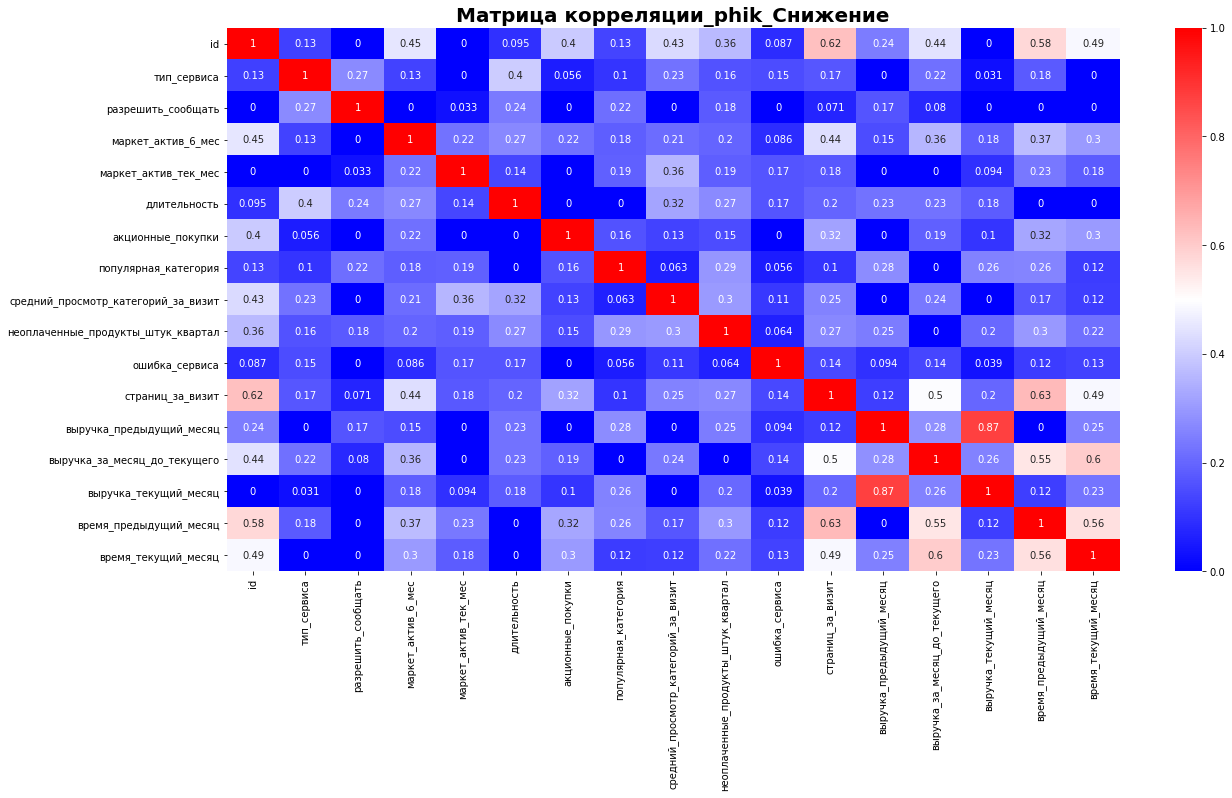

In [33]:
corr_matrix = file1.phik_matrix()
plt.figure(figsize=(20,10))

sns.heatmap(corr_matrix, annot=True, cmap='bwr')
plt.title('Матрица корреляции_phik_Снижение', fontsize=20, fontweight="bold" )
plt.show()

In [34]:
file2 = data[data['покупательская_активность'] == 'Прежний уровень']

#plt.figure(figsize=(15,5))

#plt.rc('font', size= 12) 
#chart = sns.heatmap(file[file.columns[file.columns != 'id']].corr(), annot=True,cmap='bwr')
#plt.title('Тепловая карта. Визуализация корреляций_прежний уровень.', fontsize=14, fontweight="bold" ) 

#plt.show()

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_за_месяц_до_текущего', 'выручка_текущий_месяц', 'время_предыдущий_месяц', 'время_текущий_месяц']


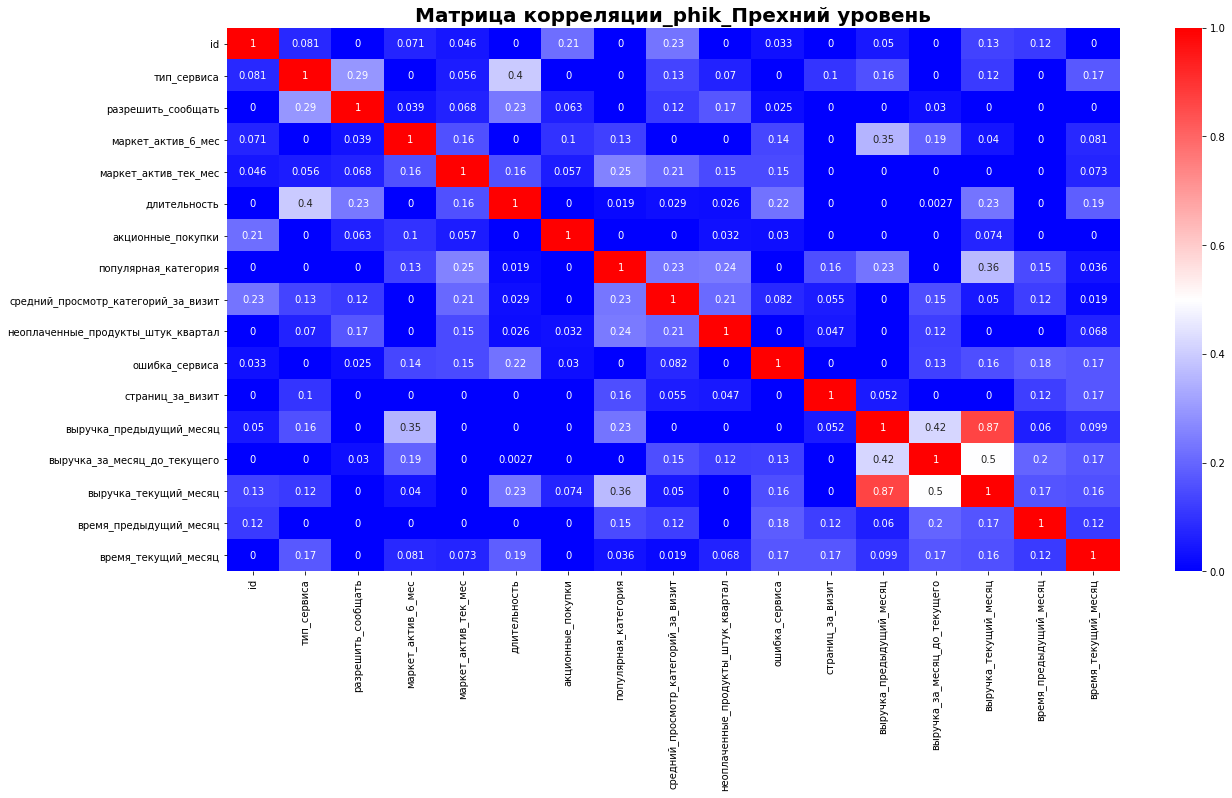

In [35]:
corr_matrix = file2.phik_matrix()
plt.figure(figsize=(20,10))

sns.heatmap(corr_matrix, annot=True, cmap='bwr')
plt.title('Матрица корреляции_phik_Прехний уровень', fontsize=20, fontweight="bold" )
plt.show()

Вывод: Произведен корреляционный анализ данных.
Целевой признак "Покупательская активность":
- Bмеет высокую корреляцию с признаками "страниц за визит'.
- Заметную корреляцию с признаками 'маркет_актив_6_мес', 'акционные_покупки','средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал','выручка_за_месяц_до_текущего',  'время_предыдущий_месяц', 'время_текущий_месяц'.
- Умеренную с признаком 'популярная_категория.

'Матрица корреляции_phik_Снижение' имеет более выраженную корреляцию признаков чем 'Матрица корреляции_phik_Прехний уровень'

Наблюдается высокая корреляция между признаками "Выручка_предыдущий_месяц" и "Выручка_текущий_месяц" с коэффициентом корреляции 0.8. Мультиколлинеарность имеет место при значении коэффициента корреляции от 0.9 до 0.95.

#### Шаг_6
## Использование пайплайнов

In [36]:
#разделим выборку
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['id','покупательская_активность'], axis=1),
    data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['покупательская_активность'])
#провекрка
X_train.shape, X_test.shape

((972, 16), (324, 16))

In [37]:
#print(num_columns)
# создаём списки с названиями признаков

ohe_columns = ['тип_сервиса', 'разрешить_сообщать']
#используем OrdinalEncoder т.к. большое количетво категориальных признаков
ord_columns = ['популярная_категория']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность','акционные_покупки',\
               'средний_просмотр_категорий_за_визит','неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',\
               'страниц_за_визит', 'выручка_предыдущий_месяц','выручка_за_месяц_до_текущего', 'выручка_текущий_месяц',\
               'время_предыдущий_месяц', 'время_текущий_месяц']


In [38]:
#кодирование целевого признака
label_encoder = LabelEncoder()
label_mapping = {'Снизилась': 1, 'Прежний уровень': 0}
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [39]:
# создаём пайплайн для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )


In [40]:
ord_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder( handle_unknown='error'))
    ])

In [41]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [42]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [43]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC
   
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [44]:
grid = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
#   random_state=RANDOM_STATE,
    n_jobs=-1
)
grid.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   

In [45]:
y_pred = grid.predict_proba(X_test)
y_test_pred = grid.predict(X_test)
print('Лучшая модель и её параметры:\n\n', grid.best_params_) 
print('Метрика лучшей модели на кросс валидацинной выборке:', grid.best_score_) 
print('Метрика ROC-AUC на тестовой выборке:',round(roc_auc_score(y_test, y_pred[:, 1]), 4))
print('Метрика F1 на тестовой выборке:',f1_score(y_test, y_test_pred, average="macro"))

Лучшая модель и её параметры:

 {'models': SVC(C=1, probability=True, random_state=42), 'models__C': 1, 'preprocessor__num': StandardScaler()}
Метрика лучшей модели на кросс валидацинной выборке: 0.9136341647432555
Метрика ROC-AUC на тестовой выборке: 0.9166
Метрика F1 на тестовой выборке: 0.8976583557951483


In [46]:
#y_test_pred = grid.predict(X_test)
#print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')
#print(f'Метрика F1 на тестовой выборке: {f1_score(y_test, y_test_pred, average="macro")}')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


    С точки зрения постановки бизнес задачи, нам важнее precision. Нужны предложения котороые помогут удержать потенциалных клинетов    
    
    
Вообще больше похоже на recall (позволит нам найти максимальное количество клиентов потенциально собирающихся снизить активность)    
    
    
    ссылка "тут" не токрывается 
    
    
Попробуй с VPN, у меня всё открывается    

In [47]:
#randomized_search = RandomizedSearchCV(
#    pipe_final, 
#    param_grid=param_grid, 
#    cv=5,
#    scoring='roc_auc',
#    random_state=RANDOM_STATE,
#    n_jobs=-1
#)
#randomized_search.fit(X_train, y_train)

#print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
#print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

#y_test_pred = randomized_search.predict(X_test)
#print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')
#print(f'Метрика F1 на тестовой выборке: {f1_score(y_test, y_test_pred, average="macro")}')

In [48]:
result = pd.DataFrame(grid.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(5)) 


,rank_test_score,param_models,mean_test_score,params
273,1,"SVC(C=1, probability=True, random_state=42)",0.91,"{'models': SVC(C=1, probability=True, random_state=42), 'models__C': 1, 'preprocessor__num': StandardScaler()}"
276,2,"SVC(C=1, probability=True, random_state=42)",0.91,"{'models': SVC(C=1, probability=True, random_state=42), 'models__C': 2, 'preprocessor__num': StandardScaler()}"
279,3,"SVC(C=1, probability=True, random_state=42)",0.91,"{'models': SVC(C=1, probability=True, random_state=42), 'models__C': 3, 'preprocessor__num': StandardScaler()}"
282,4,"SVC(C=1, probability=True, random_state=42)",0.91,"{'models': SVC(C=1, probability=True, random_state=42), 'models__C': 4, 'preprocessor__num': StandardScaler()}"
288,5,"SVC(C=1, probability=True, random_state=42)",0.91,"{'models': SVC(C=1, probability=True, random_state=42), 'models__C': 6, 'preprocessor__num': StandardScaler()}"


# ***Вывод:*** 
Лучшая модель метода опорных векторов SVC(C=1, probability=True, random_state=42), маштабирование StandardScaler()}

- Метрика лучшей модели на кросс валидацинной выборке: 0.914
- Метрика ROC-AUC на тестовой выборке: 0.9166
- Метрика F1 на тестовой выборке: 0.898

#### Шаг_7
## Анализ важности признаков

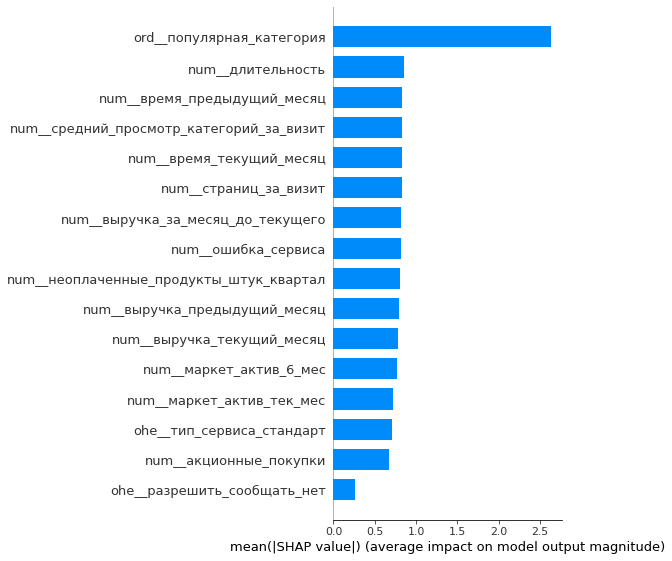

In [49]:
#поиск важных признаков
X_train_new = grid.best_estimator_.named_steps['preprocessor'].transform(X_train)
X_test_new = grid.best_estimator_.named_steps['preprocessor'].transform(X_test)
model_1 = grid.best_estimator_['models'].fit(X_train_new, y_train)
explainer_1 = shap.PermutationExplainer(model_1, X_train_new)

labels_1 = grid.best_estimator_['preprocessor'].get_feature_names_out()

shap.summary_plot(X_train_new, plot_type='bar', feature_names=labels_1) 

***Вывод:*** Наиболее важными признаками будут длительность (с момента регистрации пользователя), минуты - время, проводимое на сайте, категории за визит, количество просмотренных страниц. Много практически одинаковых по важности признаков - от длительности до количества покупок по акциям. 


#### Шаг_8
## Сегментация покупателей

In [50]:
#segment = data.drop(['Покупательская активность'], axis=1)
#display(segment.sample(1))

In [51]:
data.head(1)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_за_месяц_до_текущего,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5,5216.00,4472.00,4971.60,12,10


In [52]:
segment=data
segment['вероятность_снижения'] = grid.best_estimator_.predict_proba(segment)[:,1]

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Так ты сначала проверь что .predict_proba(segment)[:,1] это 'вероятность_снижения', а если проверял то покажи проверку
    
  <div class="alert alert-info" style="border-radius:solid lime 2px; 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
Прежде всего по рекомендации я смапил значения целевого признака (label_mapping = {'Снизилась': 1, 'Прежний уровень': 0})

Вот такой ответ я получил  от преподователя:  
"Зачем это проверять? Модель классификации училась на размеченных данных предсказывать факт снижения покупательской активности - бинарную целевую переменную 0 или 1. На сколько хорошо она выучилась проверяют метриками машинного обучения. Метод predict в моделях классификации предсказывает метку класса (то, что учили предсказывать), а predict_proba - вероятность класса. Фактически predict возвращает 1, если predict_proba, возвращает значение больше 0.5."

      Тем не менее проверим...
</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Так ты выше не кодировал единицей снизилась, ты просто использовал LabelEncoder (В этом случае он произвольно кодирует текст),  а теперь представь что у нас снизилась закодировалась нулём.  И тогда вероятно снизилась у нас была бы не .predict_proba(segment)[:,1] а .predict_proba(segment)[:,0]
    

In [53]:
#Переведем признак'покупательская_активность' в булевый тип и посчитаем корреляцию с предсказанным признаком
segment['покупательская_активность_1']=segment['покупательская_активность'].apply(lambda x: 1 if x=='Снизилась' else 0)
print('Корреляция составила',segment['вероятность_снижения'].corr(segment['покупательская_активность_1']))
segment=segment.drop(['покупательская_активность_1'], axis=1)

Корреляция составила 0.8354904976892505


Что свидетельствует о том что предсказанное значение, это вероятность снижениия покупательской активности.

In [54]:
#добавим параметр "Прибыль"
segment = segment.merge(df_money,how='left', on = 'id')
display(segment.sample(1))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_за_месяц_до_текущего,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,вероятность_снижения,прибыль
45,215397,Снизилась,стандарт,да,4.20,3,689,0.31,Домашний текстиль,4,2,2,3,4541.00,4430.00,5040.20,6,8,1.00,3.19


In [55]:
segment['прибыль'].describe()

count   1296.00
mean       4.00
std        1.01
min        0.86
25%        3.30
50%        4.04
75%        4.67
max        7.43
Name: прибыль, dtype: float64

Проведем анализ по признаку прибыль, так как он важен для бизнеса.

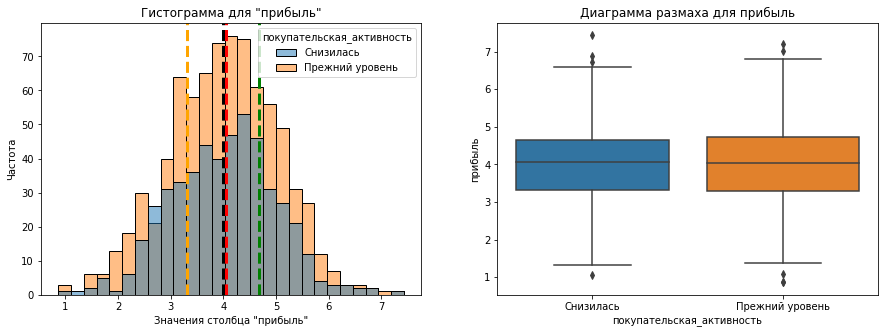

In [56]:
hist_box_h(segment,'прибыль')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Вот стоило поэтому уже подобию и оформить графики выше.  Тут у тебя всё как надо, используешь seaborn, subplots, hue...


 

In [57]:
segment['прибыль'].describe()

count   1296.00
mean       4.00
std        1.01
min        0.86
25%        3.30
50%        4.04
75%        4.67
max        7.43
Name: прибыль, dtype: float64

Выделим сегмент пользователей у которых покупательская активность снизилась, а прибыль выше третего квартиля, так как их уход будет означать реальные потери выручки для бизнеса.

In [62]:

#segment_profit.describe()


count   1296.00
mean       4.00
std        1.01
min        0.86
25%        3.30
50%        4.04
75%        4.67
max        7.43
Name: прибыль, dtype: float64

In [63]:
#Посмотрим среднюю Вероянтость снижения  по категориям с учетом 
segment.pivot_table(index=['популярная_категория'], values=['вероятность_снижения','прибыль','маркет_актив_6_мес','акционные_покупки'], aggfunc='mean')

,акционные_покупки,вероятность_снижения,маркет_актив_6_мес,прибыль
популярная_категория,,,,
Домашний текстиль,0.30,0.41,4.21,4.01
Косметика и аксесуары,0.33,0.47,4.21,4.09
Кухонная посуда,0.36,0.48,4.08,4.06
Мелкая бытовая техника и электроника,0.27,0.19,4.55,3.94
Техника для красоты и здоровья,0.32,0.28,4.35,3.79
Товары для детей,0.34,0.42,4.19,4.04


In [65]:

segment.columns


Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_за_месяц_до_текущего', 'выручка_текущий_месяц',
       'время_предыдущий_месяц', 'время_текущий_месяц', 'вероятность_снижения',
       'прибыль'],
      dtype='object')

In [ ]:
def histogram(df, col):
    plt.figure(figsize=(8,6))
    plot = sns.histplot(df, bins=20, kde=True, x=col)
    plot.set_title(f'Рапределение по {col}', fontsize=16)
    plot.set_ylabel('Количество', fontsize=14)

In [ ]:
num_seg_names = df_market_file.select_dtypes(include='number').columns.tolist()
num_seg_names.remove('id') #удалим ID из списка.
for i in num_seg_names:
    histogram(segment_profit, i)


Вывод по сегменту прибыль:
В процессе сегментации был выделен следующий сегмент и выполнен сравнительный анализ:
Выделен сегмент пользователей у которых покупательская активность снизилась, а прибыль выше третьего квартиля, так как их уход будет означать большую потерю выручки для бизнеса.
Среди выделенного сегмента пользователей наблюдаются следующие тенденции:
Снижение количества просмотренных страниц за визит, за последние 3 месяца.
Снижение общего времени проведенного на сайте за все периоды.
Меньшее количество просмотренных категорий за визит.
Снижение интереса к некоторым категориям товаров.

In [64]:
segment.pivot_table(index='тип_сервиса', values='вероятность_снижения', aggfunc='mean')

,вероятность_снижения
тип_сервиса,
премиум,0.45
стандарт,0.35


Требуется проанализировать преимущества преимум сегмента, похоже их недостаточно для стимулирования совершения покупок. В среднем вероятность снижения у премиум семента выше чем у стандартного.

#### Шаг_9
## Вывод

Общий вывод.

1. Загрузка данных.

Выполнена загрузка данных.

2. Предобработка данных.

- Осуществлена проверка на пропуски в данных. Пропусков в данных нет.
- Удалены неявные дубликаты в df_market_file, df_market_time.
- Выполнено преобразование только одного типа данных в df_money.

3. Исследовательский анализ данных.

Вывод по числовым колонкам: 

+ По графе "Маркет_актив_6_мес" среднее значение 4.25, медиана 4.2 минимум 0.9, макисмум 6.6
+ По графе "Маркет_актив_тек_мес" среднее значение 4.01, медиана 4 минимум 3, макисмум 5
+ По графе "Длительность" среднее значение 601 , медиана 606 минимум 110, макисмум 1079
+ По графе "Акционные_покупки" среднее значение 0.32 , медиана 0.24 минимум 0, макисмум 0.99
+ По графе "Средний_просмотр_категорий_за_визит" среднее значение 3.27 , медиана 3 минимум 1, макисмум 6
+ По графе "Неоплаченные_продукты_штук_квартал" среднее значение 2.84 , медиана 3 минимум 0, макисмум 10
+ По графе "Ошибка_сервиса" среднее значение 4.19 , медиана 4 минимум 0, макисмум 9
+ По графе "Страниц_за_визит" среднее значение 8.18 , медиана 8 минимум 1, макисмум 20

Распределение нормальное, присутствуют выбросы.
По категориальны колонкам
- Активность снизилась у 38%
- Тип сервиса преобладает "стандатный" 71%
- Как правило клиенты в 74% разрешают использовать номер телефона для рекламы
По категориям:
- товары для детей составляют 25,4%
- домашний текстиль 19,3%
- Косметика и аксесуары 17,2%
- Техника для красоты и здоровья 14,2%
- Кухонная посуда 10,6%
- Мелкая бытовая техника и электроника 13,4%

4. Объединение таблиц.

Произведено объединение данных, отобраны клинеты с покупательной активностью  не менее 3х месяцев.

5. Корреляционный анализ.

Вывод: Произведен корреляционный анализ данных.
Целевой признак "Покупательская активность":
- Bмеет высокую корреляцию с признаками "страниц за визит'.
- Заметную корреляцию с признаками 'маркет_актив_6_мес', 'акционные_покупки','средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал','выручка_за_месяц_до_текущего',  'время_предыдущий_месяц', 'время_текущий_месяц'.
- Умеренную с признаком 'популярная_категория.

'Матрица корреляции_phik_Снижение' имеет более выраженную корреляцию признаков чем 'Матрица корреляции_phik_Прехний уровень'

Наблюдается высокая корреляция между признаками "Выручка_предыдущий_месяц" и "Выручка_текущий_месяц" с коэффициентом корреляции 0.8. Мультиколлинеарность имеет место при значении коэффициента корреляции от 0.9 до 0.95.

6. Использование пайплайнов.

Лучшая модель метода опорных векторов SVC(C=1, probability=True, random_state=42), маштабирование StandardScaler()}

- Метрика лучшей модели на кросс валидацинной выборке: 0.9136341647432555
- Метрика ROC-AUC на тестовой выборке: 0.9166
- Метрика F1 на тестовой выборке: 0.8976583557951483

7. Анализ важности признаков.
Наиболее важные признаки: длительность (с момента регистрации пользователя), минуты - время, проводимое на сайте, категории за визит, количество просмотренных страниц. Много практически одинаковых по важности признаков - от длительности до количества покупок по акциям.
8. Сегментация покупателей.

Выплнена сегментация.
В процессе сегментации был выделен следующий сегмент и выполнен сравнительный анализ:
Выделен сегмент пользователей у которых покупательская активность снизилась, а прибыль выше третего квартиля, так как их уход будет означать большую потерю выручки для бизнеса.
Среди выделенного сегмента пользователей наблюдаются следующие тенденции:
- Снижение количества просмотренных страниц за визит, за последние 3 месяца.
- Снижение общего времени проведенного на сайте за все периоды.
- Меньшее количество просмотренных категорий за визит.
- Снижение интереса к некоторым категориям товаров.